## Outline
- [Data preparation & investigation](#Data-preparation-&-investigation)
- [RFM](#RFM)
- [Determine Quartiles](#Determine-Quartiles)
- [Create the RFM segmentation table](#Create-the-RFM-segmentation-table)
- [Plotting RFM table](#Plotting-RFM-table)

In [74]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Reading data
df = pd.read_excel(r".\Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [76]:
cols = ['Row ID', 'Sales', 'Quantity', 'Discount', 'Grand Total']
df['Grand Total'] = df['Sales'] * df['Quantity'] * (1-df['Discount'])
df[cols]

,Row ID,Sales,Quantity,Discount,Grand Total
0,1,261.9600,2,0.00,523.920000
1,2,731.9400,3,0.00,2195.820000
2,3,14.6200,2,0.00,29.240000
3,4,957.5775,5,0.45,2633.338125
4,5,22.3680,2,0.20,35.788800
...,...,...,...,...,...
9989,9990,25.2480,3,0.20,60.595200
9990,9991,91.9600,2,0.00,183.920000
9991,9992,258.5760,2,0.20,413.721600
9992,9993,29.6000,4,0.00,118.400000


## Data preparation & investigation

[Outline](#Outline)

In [77]:
def check_df(dataframe):
    print("################=Shape=####################")
    print(dataframe.shape)
    print('')
    print("###############=Columns=###################")
    print(dataframe.columns)
    print('')
    print("###############=Types=#####################")
    print(dataframe.dtypes)
    print('')
    print("###############=Head=######################")
    print(dataframe.head())
    print('')
    print("###############=Tail=######################")
    print(dataframe.tail())
    print('')
    print("###############=Describe=###################")
    print(dataframe.describe().T)
check_df(df)

################=Shape=####################
(9994, 22)

###############=Columns=###################
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Grand Total'],
      dtype='object')

###############=Types=#####################
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Nam

In [78]:
df.T.drop('Row ID').reset_index()

,index,0,1,2,3,4,5,6,7,8,...,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993
0,Order ID,CA-2016-152156,CA-2016-152156,CA-2016-138688,US-2015-108966,US-2015-108966,CA-2014-115812,CA-2014-115812,CA-2014-115812,CA-2014-115812,...,CA-2015-100251,CA-2015-100251,CA-2016-125794,CA-2017-163629,CA-2017-163629,CA-2014-110422,CA-2017-121258,CA-2017-121258,CA-2017-121258,CA-2017-119914
1,Order Date,2016-11-08 00:00:00,2016-11-08 00:00:00,2016-06-12 00:00:00,2015-10-11 00:00:00,2015-10-11 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00,2014-06-09 00:00:00,...,2015-05-17 00:00:00,2015-05-17 00:00:00,2016-09-29 00:00:00,2017-11-17 00:00:00,2017-11-17 00:00:00,2014-01-21 00:00:00,2017-02-26 00:00:00,2017-02-26 00:00:00,2017-02-26 00:00:00,2017-05-04 00:00:00
2,Ship Date,2016-11-11 00:00:00,2016-11-11 00:00:00,2016-06-16 00:00:00,2015-10-18 00:00:00,2015-10-18 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00,2014-06-14 00:00:00,...,2015-05-23 00:00:00,2015-05-23 00:00:00,2016-10-03 00:00:00,2017-11-21 00:00:00,2017-11-21 00:00:00,2014-01-23 00:00:00,2017-03-03 00:00:00,2017-03-03 00:00:00,2017-03-03 00:00:00,2017-05-09 00:00:00
3,Ship Mode,Second Class,Second Class,Second Class,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,...,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Second Class,Standard Class,Standard Class,Standard Class,Second Class
4,Customer ID,CG-12520,CG-12520,DV-13045,SO-20335,SO-20335,BH-11710,BH-11710,BH-11710,BH-11710,...,DV-13465,DV-13465,ML-17410,RA-19885,RA-19885,TB-21400,DB-13060,DB-13060,DB-13060,CC-12220
5,Customer Name,Claire Gute,Claire Gute,Darrin Van Huff,Sean O'Donnell,Sean O'Donnell,Brosina Hoffman,Brosina Hoffman,Brosina Hoffman,Brosina Hoffman,...,Dianna Vittorini,Dianna Vittorini,Maris LaWare,Ruben Ausman,Ruben Ausman,Tom Boeckenhauer,Dave Brooks,Dave Brooks,Dave Brooks,Chris Cortes
6,Segment,Consumer,Consumer,Corporate,Consumer,Consumer,Consumer,Consumer,Consumer,Consumer,...,Consumer,Consumer,Consumer,Corporate,Corporate,Consumer,Consumer,Consumer,Consumer,Consumer
7,Country,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
8,City,Henderson,Henderson,Los Angeles,Fort Lauderdale,Fort Lauderdale,Los Angeles,Los Angeles,Los Angeles,Los Angeles,...,Long Beach,Long Beach,Los Angeles,Athens,Athens,Miami,Costa Mesa,Costa Mesa,Costa Mesa,Westminster
9,State,Kentucky,Kentucky,California,Florida,Florida,California,California,California,California,...,New York,New York,California,Georgia,Georgia,Florida,California,California,California,California


In [79]:
# Missing data
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Grand Total      0
dtype: int64

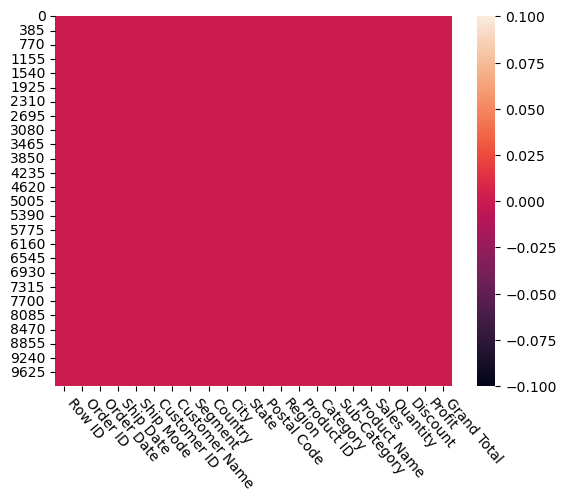

In [80]:
sns.heatmap(df.isnull())

plt.xticks(rotation=310, ha='left')
plt.show()

In [81]:
# Checks Sales for negative and 0
df.loc[df['Sales']<=0,:]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Grand Total


In [82]:
# Checks Quantity for negative and 0
df.loc[df['Quantity']<=0,:]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Grand Total


In [83]:
# Check unique items
Lists = ['Category', 'Sub-Category']

for i in Lists:
    print(i, 'includes', len(df[i].unique()), 'unique items :', df[i].unique(), '\n')

Category includes 3 unique items : ['Furniture' 'Office Supplies' 'Technology'] 

Sub-Category includes 17 unique items : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] 



In [84]:
# Check items per Category
category = pd.DataFrame(df.groupby(['Category', 'Sub-Category'])['Product Name'].count().reset_index())
category.loc['Total'] = category.sum(numeric_only=True)
category

,Category,Sub-Category,Product Name
0,Furniture,Bookcases,228.0
1,Furniture,Chairs,617.0
2,Furniture,Furnishings,957.0
3,Furniture,Tables,319.0
4,Office Supplies,Appliances,466.0
5,Office Supplies,Art,796.0
6,Office Supplies,Binders,1523.0
7,Office Supplies,Envelopes,254.0
8,Office Supplies,Fasteners,217.0
9,Office Supplies,Labels,364.0


## RFM

[Outline](#Outline)

In [85]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Grand Total
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.920000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.820000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.240000
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2633.338125
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,35.788800


In [86]:
# Cut-off: 31/12/2017
rfm = df.groupby('Customer ID').agg({'Order Date': lambda x: (pd.Timestamp('2017-12-31') - x.max()).days, # Recency
                                        'Order ID': lambda x: len(x),      # Frequency
                                        'Grand Total': lambda x: x.sum()}) # Monetary Value

rfm['Order Date'] = rfm['Order Date'].astype(int)
rfm.rename(columns={'Order Date': 'Recency', 
                         'Order ID': 'Frequency', 
                         'Grand Total': 'Monetary'}, inplace=True)

rfm

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,11,13127.81920
AA-10375,20,15,2583.99800
AA-10480,260,12,5484.60480
AA-10645,56,18,20435.19565
AB-10015,416,6,1969.68800
...,...,...,...
XP-21865,44,28,7938.71160
YC-21895,5,8,26323.57080
YS-21880,10,12,40920.86560


In [87]:
df.loc[df['Customer ID']=='AB-10015', ['Order Date', 'Order ID', 'Grand Total']].sort_values(by=['Order Date']).reset_index()

,index,Order Date,Order ID,Grand Total
0,8222,2014-02-18,CA-2014-152905,20.1984
1,4961,2014-03-07,CA-2014-156587,38.9696
2,4962,2014-03-07,CA-2014-156587,53.8200
3,4963,2014-03-07,CA-2014-156587,728.8200
4,8801,2016-11-10,CA-2016-140935,443.9600
5,8802,2016-11-10,CA-2016-140935,683.9200


## Determine Quartiles

[Outline](#Outline)

In [88]:
quantiles = rfm.quantile(q=[0,0.25,0.5,0.75,1])
quantiles

,Recency,Frequency,Monetary
0.00,1.0,1.0,3.1347
0.25,31.0,8.0,3953.1032
0.50,76.0,12.0,8421.4580
0.75,184.0,16.0,16264.7809
1.00,1166.0,37.0,141627.4007


## Create the RFM segmentation table

[Outline](#Outline)

In [89]:
# create labels and assign them to tree percntile groups 
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)

f_labels = range(1, 5)
f_groups = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)

m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q = 4, labels = m_labels)

m_groups.head()

Customer ID
AA-10315    3
AA-10375    1
AA-10480    2
AA-10645    4
AB-10015    1
Name: Monetary, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [90]:
# make a new column for group labels
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [91]:
# sum up the three columns
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm['Rank'] = rfm['RFM_Score']/3

rfm['Segment'] = 'Low'
rfm.loc[(rfm['RFM_Score'] < 7) & (rfm['RFM_Score'] >= 4), 'Segment'] = 'Normal'
rfm.loc[rfm['RFM_Score'] >= 7, 'Segment'] = 'VIP'
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Rank,Segment
Customer ID,,,,,,,,,,
AA-10315,185,11,13127.81920,1,2,3,123,6,2.000000,Normal
AA-10375,20,15,2583.99800,4,3,1,431,8,2.666667,VIP
AA-10480,260,12,5484.60480,1,2,2,122,5,1.666667,Normal
AA-10645,56,18,20435.19565,3,4,4,344,11,3.666667,VIP
AB-10015,416,6,1969.68800,1,1,1,111,3,1.000000,Low
...,...,...,...,...,...,...,...,...,...,...
XP-21865,44,28,7938.71160,3,4,2,342,9,3.000000,VIP
YC-21895,5,8,26323.57080,4,1,4,414,9,3.000000,VIP
YS-21880,10,12,40920.86560,4,2,4,424,10,3.333333,VIP


In [92]:
rfm.loc[['AA-10315','AA-10375'], :]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Rank,Segment
Customer ID,,,,,,,,,,
AA-10315,185,11,13127.8192,1,2,3,123,6,2.000000,Normal
AA-10375,20,15,2583.9980,4,3,1,431,8,2.666667,VIP


## Plotting RFM table

[Outline](#Outline)

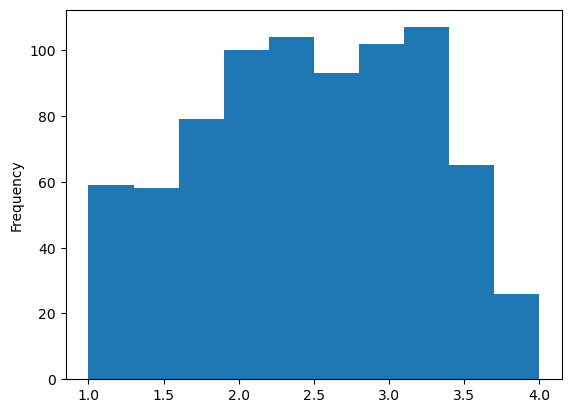

In [93]:
rfm['Rank'].plot.hist(bins = 10)
plt.show()

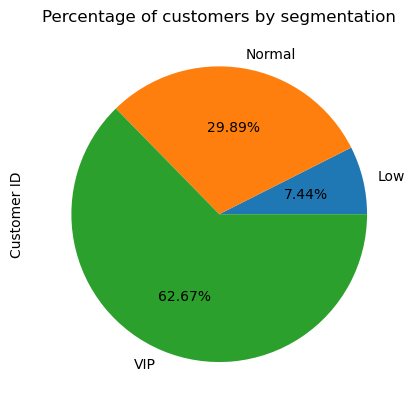

In [94]:
rfm.reset_index().groupby('Segment')['Customer ID'].count().plot.pie(autopct = '%.2f%%')
plt.title('Percentage of customers by segmentation')
plt.show()

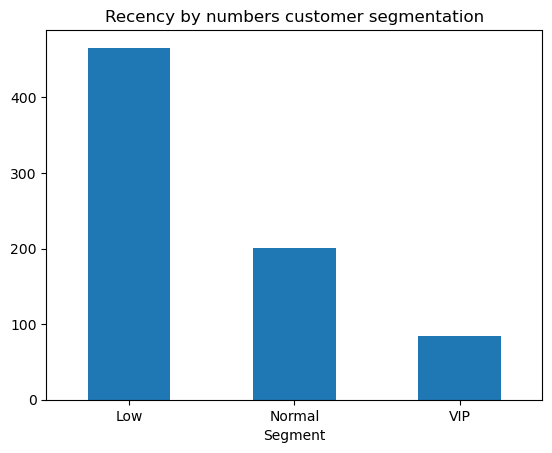

In [95]:
rfm.groupby('Segment')['Recency'].mean().plot.bar()
plt.xticks(rotation=0)
plt.title('Recency by numbers customer segmentation')
plt.show()

VIP and Normal customers frequently return to store to make purchase, while Low customers spend significantly less time than other segmentations.

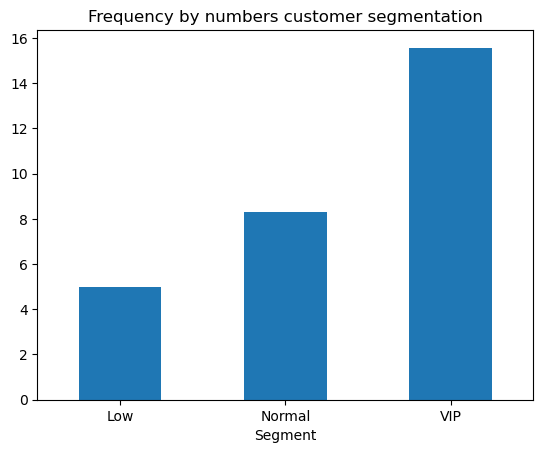

In [96]:
rfm.groupby('Segment')['Frequency'].mean().plot.bar()
plt.xticks(rotation=0)
plt.title('Frequency by numbers customer segmentation')
plt.show()

VIP make more significant purchase than Normal and Low customers.

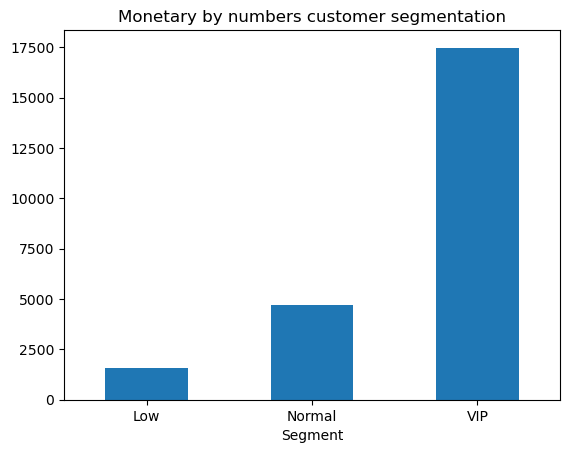

In [97]:
rfm.groupby('Segment')['Monetary'].mean().plot.bar()
plt.xticks(rotation=0)
plt.title('Monetary by numbers customer segmentation')
plt.show()

VIP customers spend 17.500 USD to buy items, which is more than double the amound of Normal segmentation.